Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

**Responses:**

**Business need and modeling objective**

Users of Tiktok can report videos that they think do not meet he platform's terms of service. There are millions of videos everyday and this then means that many videos get reported, too many to be reviewed by a human.

Analysis of the data review that when authors do violate these terms of service, they are more likely to be posting a claim rather than a opinion. This makes it important to know whether a video is a claim or an opinion.

The TikTok team wants to make a machine learning model to predict whether a video is a claim or an opinion. Videos that are labeled opinions will be less likely reviewed by a human moderator. Videos that are labeled as claims will be futher sorted by a downstream process to determine whether they should get prioritized for review. For example, perhaps videos taht are classified as claims would then be ranked by how many times they were reported, then the top percent would be reviewed by a human each day. 

Knowing this a machine learning model would be a huge assistance to present human moderators with videos that are most likely to be in violation of TikTok's terms of service.

**Modeling design and target variable**

The data dictionary shows that their is a column called claim_status. This is binary variable that displays whether a video is a claim or an opinion. This will be our target variable in our model, which means the model will predict whether the video is a claim or an opinion. This is a classification problem since we are predicting a binary class.

**Select an evaluation metric**
**False positives:** this is when the model predicts that a video is a claim when it is an opinion.
**False negatives:** this is when the model predicts that a video is a opinion when it is an claim.

**Ethical Implications of building the model?:** In this model it is better for the model to predict false positives when it does make a mistake, and worse for it to predict false negative. t's very important to identify videos that break the terms of service, even if that means some opinion videos are misclassified as claims. The worst case for an opinion misclassified as a claim is that the video goes to human review. The worst case for a claim that's misclassified as an opinion is that the video does not get reviewed and it violates the terms of service. A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.
Since it is more important to minimize false negative, the model evaluation metric will be **recall**.

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np 

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,precision_score,\
recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns

data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns

data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [10]:

# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates

data.duplicated().sum()

0

Check for and handle outliers.

**Tree-based models** do not require us to check or drop values that are outliers as they are robust to outliers.

Check class balance.

In [12]:
# Check class balance
# lets check the difference between claim stated and opinion based video counts.
data['claim_status'].value_counts(normalize=True)


claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

Claims videos account for 50.3% and opinion based videos account for 49.6% of the total count. So these numbers are fairly balanced.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [13]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
# lets create a new column called text length to extract this information from variable within our dataset

data['text_length'] = data['video_transcription_text'].str.len()
# to see if the new column is added and is working properly
data.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137


Calculate the average text_length for claims and opinions.

In [14]:
# Calculate the average text_length for claims and opinions

data[['claim_status','text_length']].groupby('claim_status').mean()


,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

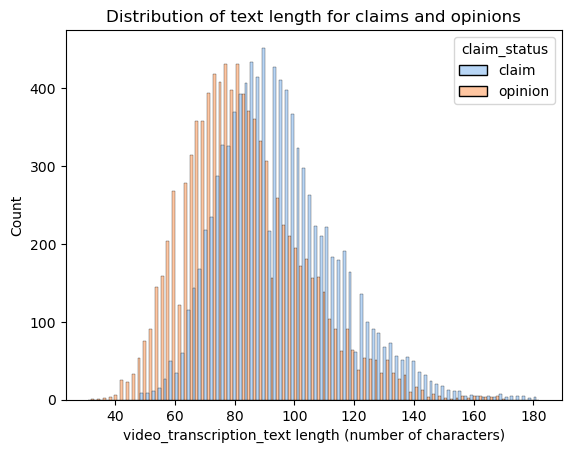

In [15]:
# Visualize the distribution of `text_length` for claims and opinions

sns.histplot(data=data,stat='count',
             x='text_length',multiple='dodge',
             hue='claim_status',kde=False,
             palette='pastel',element='bars')
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of text length for claims and opinions")
plt.show()


**Feature selection and transformation**

Encode target and catgorical variables.

In [16]:
# Create a copy of the X data
X = data.copy()
# Drop unnecessary columns
### YOUR CODE HERE ###
X = data.drop(['#','video_id'],axis=1)
# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion':0,'claim':1})
# Dummy encode remaining categorical values
X = pd.get_dummies(X,columns=['verified_status','author_ban_status'],drop_first=True)

### **Task 4: Split the data**

Assign target variable.

In [17]:
# Isolate target variable
### YOUR CODE HERE ###
Y = X['claim_status']

Isolate the features.

In [18]:
# Isolate features
### YOUR CODE HERE ###
X = X.drop(['claim_status','video_transcription_text'],axis=1)
# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [19]:
# Split the data into training and testing sets
X_tr,X_test,Y_tr,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [20]:
# Split the training data into training and validation sets
X_train,X_val,Y_train,Y_val = train_test_split(X_tr,Y_tr,test_size=0.25,random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [21]:
# Get shape of each training, validation, and testing set
X_train.shape,X_val.shape,X_test.shape,Y_train.shape,Y_val.shape,Y_test.shape

((11450, 10), (3817, 10), (3817, 10), (11450,), (3817,), (3817,))

The number of features aligns between the testing and the training sets. **(11)**
The number of rows aligns between the features and the outcome variable for training **(11,450)** and both validation and testing data **(3,817)**

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [22]:

# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)
# Create a dictionary of hyperparameters to tune
''' the hyperparameters we want within this dataset are max_depth,max_features, max_samples,
max_samples_leaf,max_samples_split,n_estimators
'''
cv_params = {'max_depth':[5,7,None],
             'max_features':[0.3,0.6],
             'max_samples':[0.7],
             'min_samples_leaf':[1,2],
             'min_samples_split':[2,3],
             'n_estimators':[75,100,200],
            }


# Define a dictionary of scoring metrics to capture
### YOUR CODE HERE ###
scoring = {'accuracy','precision','recall','f1'}
# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,cv_params,scoring=scoring,cv=5,refit='recall')

In [23]:
%%time
#tells us how much time the cell takes to run
# fit the model to the training data
rf_cv.fit(X_train,Y_train)

CPU times: user 6min 2s, sys: 759 ms, total: 6min 3s
Wall time: 6min 3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'accuracy', 'precision', 'recall', 'f1'})

In [24]:
# Examine best recall score
rf_cv.best_score_

0.9908534395531852

In [25]:
  # Get all the results from the CV and put them in a df
# creating a funtion that will build a table for results
def make_results(model_name,model_object):
    # get all the results from the CV and put them in a dataframe
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    #Isolate the row of this dataframe with the max(recall_score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_recall'].idxmax(),:]
    
    #Extract accuracy, precision, recall, and f1 score from that max row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    #Create a table of results
    table = pd.DataFrame({'Model':[model_name],
                          'F1':[f1],
                          'Recall':[recall],
                          'Precision':[precision],
                          'Accuracy':[accuracy]
                         })
    
    return table

# create a random forest results table
rf_cv_results = make_results('Random Forest CV',rf_cv)
# lets see the output
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.995143,0.990853,0.999479,0.995109


In [26]:
# Examine best parameters
rf_cv.best_params_


{'max_depth': 5,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

**The model performs very well with an average recall score of 0.990 across the 5 cross-validation folds. After checking the precision score, we see that it very clear the model is making almost a perfect classification.** 

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [27]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the encoded testing set.

In [28]:
# Display the predictions on the encoded testing set
y_pred

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [30]:
# Display the true labels of the testing set
Y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

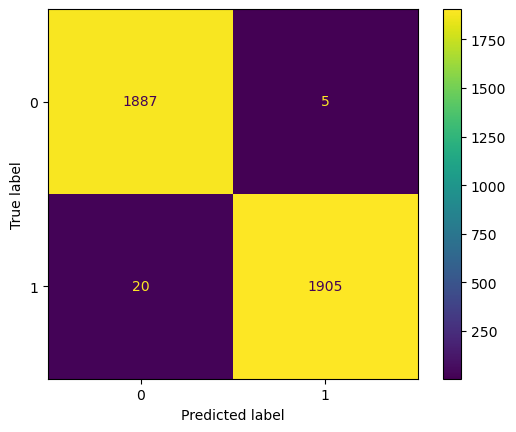

In [31]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(Y_val,y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [33]:
# Create a classification report
# Create classification report for random forest model
target_labels= ['opinion','claim']
print(classification_report(Y_val,y_pred,target_names=target_labels))


              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate? <br>
**Answer:** The classification report above shows that the scores we got in our random forest model were nearly perfect! Our confusion matrix displays that their were 10 misclassifications and 5 false negatives.

### **Use champion model to predict on test data**

In [35]:
# lets now use our random forest to predict on our test data
y_pred = rf_cv.best_estimator_.predict(X_test)

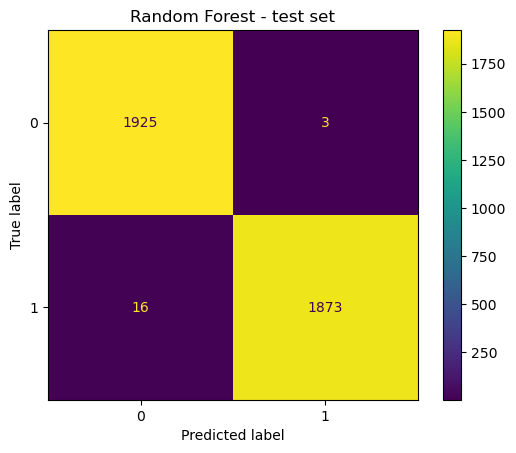

In [38]:
# Compute values for confusion matrix
log_cm= confusion_matrix(Y_test,y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=None)

# Plot confusion matrix
log_disp.plot()
# add a title
plt.title('Random Forest - test set');
# Display plot
plt.show()

#### **Feature importances of champion model**


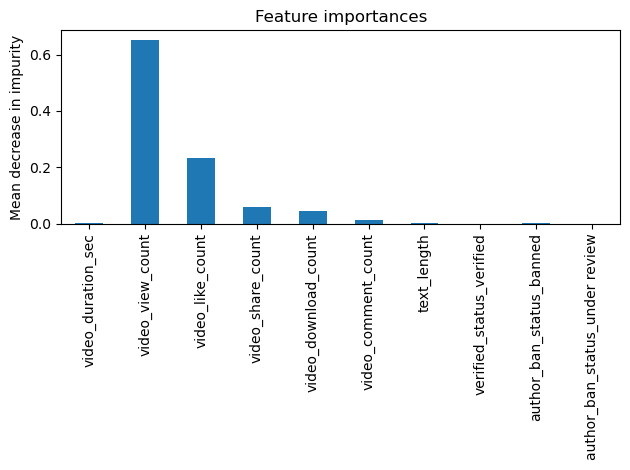

In [39]:
# lets see what predictor variable was the most important within our dataset
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances,index=X_test.columns)
# lets make our chart now
fig,ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising? <br>
**Answer:** The most predictive features all were related to engagement levels that were generated by the video. This does not come as any surprise as this has been seen in EDA prior.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. I would recommmend this model because of its perfomance. It performed extremely well on the validation and the test holdout datasets. Also, both precision and F1 scores were very high and the model was successful at classifying both claims and opinions!
2. The most important features of the model all had to do with the user engagement levels associated with each video. So our model was classifying based on how many likes, views, shares, and downloads it recieved. 
3. I would not change to model as the current model runs close to perfect, so their is no need to engineer model performance.
4. The current version of the model does not need any new features, but it would be nice to have the amount of times the  video was reported and also the total number of user reports for all videos posted by each author.